# Invariant Mass Distribution of Dilepton Samples

For the first project, we will be finding the Higgs boson in the dilepton sample. To do this we will need to compute the invariant mass and perform a fit. 

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import ROOT as R

inFileName = "../../Data/data_A.exactly2lep.root"
file = uproot.open(inFileName)

Welcome to JupyROOT 6.20/04


In [2]:
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E' ]
kins = {}
for branch in branches:
    kins[branch] = file[tree].array(branch)

In [3]:
GeVperMeV = 1./1000
kins[b'lep_px'] = kins[b'lep_pt']*np.cos( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_py'] = kins[b'lep_pt']*np.sin( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_pz'] = kins[b'lep_pt']*np.sinh( kins[b'lep_eta']) * GeVperMeV
kins[b'lep_E'] = kins[b'lep_E'] * GeVperMeV

In [4]:
kins[b'lep_px_sum'] = np.array([ np.sum(i) for i in kins[b'lep_px'] ] )
kins[b'lep_py_sum'] = np.array([ np.sum(i) for i in kins[b'lep_py'] ] )
kins[b'lep_pz_sum'] = np.array([ np.sum(i) for i in kins[b'lep_pz'] ] )
kins[b'lep_pmag'] = np.sqrt(kins[b'lep_px_sum'] ** 2 + kins[b'lep_py_sum'] ** 2 + kins[b'lep_pz_sum'] ** 2)

In [5]:
kins[b'lep_E_sum'] = np.array([ np.sum(i) for i in kins[b'lep_E'] ] )

In [6]:
kins[b'lep_m2'] = kins[b'lep_E_sum']**2 - kins[b'lep_pmag']**2
bad_entries = np.where(kins[b'lep_m2']< 0)
for entry in bad_entries:
    kins[b'lep_m2'] = np.delete(kins[b'lep_m2'], entry, 0)

In [7]:
kins[b'inv_mass'] = np.sqrt( kins[b'lep_m2'] )

In [8]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

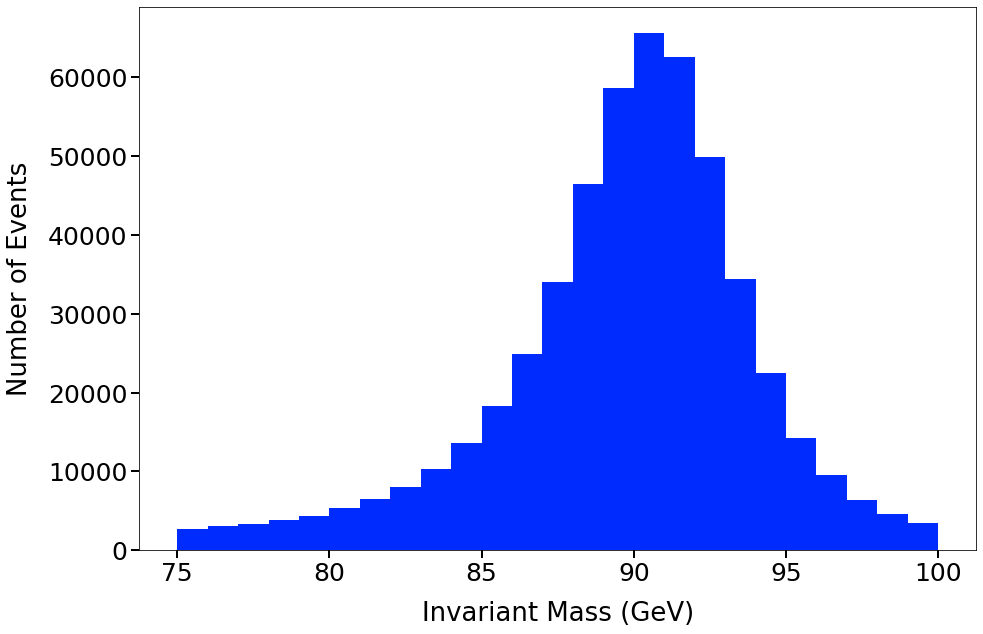

In [9]:
yTitle = "Number of Events"
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(75,100,26))

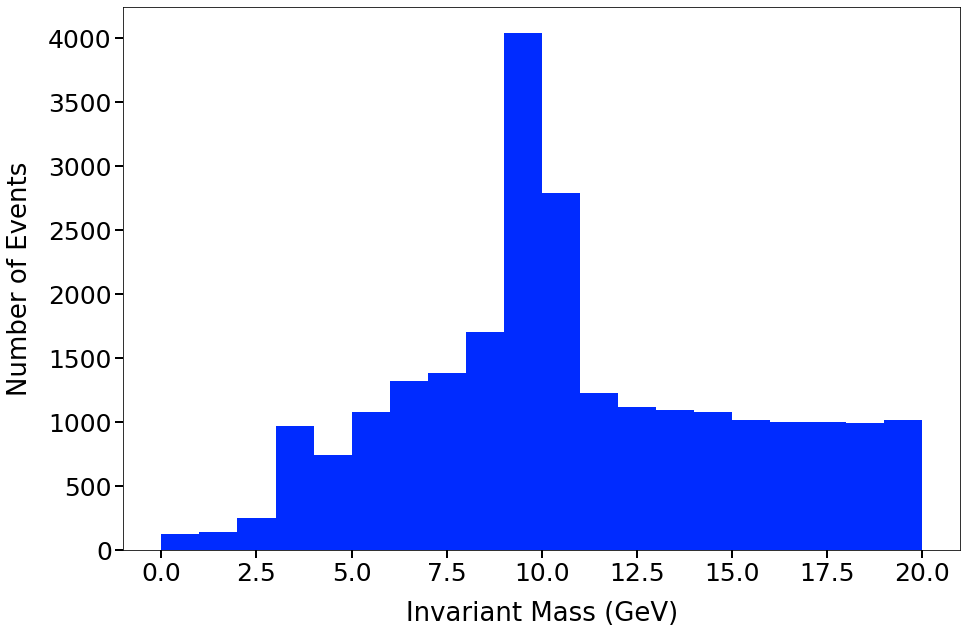

In [10]:
yTitle = "Number of Events"
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(0,20,21))

In [22]:
kins[b'4vecs'] = []
kins[b'xi'] = []
InvMassVsXi = R.TH2D("InvMassVsXi","",40,0,3.1415,150,0,150)
Xi = R.TH1D("Xi","",40,0,3.1415)
CosAbsXi = R.TH1D("CosAbsXi","",20,-1,1)

for px,py,pz,E,Mass in zip(kins[b'lep_px'],kins[b'lep_py'],kins[b'lep_pz'],kins[b'lep_E'],kins[b'inv_mass']):
    v0 = R.TLorentzVector(px[0],py[0],pz[0],E[0])
    v1 = R.TLorentzVector(px[1],py[1],pz[1],E[1])
    kins[b'4vecs'].append([v0,v1])
    xi = v0.Angle(v1.Vect())
    M = (v0+v1).Mag()
    kins[b'xi'].append(xi)
    InvMassVsXi.Fill(xi,M)
    Xi.Fill(xi)
    CosAbsXi.Fill(np.cos(abs(xi)))

Warning in <TROOT::Append>: Replacing existing TH1: InvMassVsXi (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Xi (Potential memory leak).


Info in <TCanvas::Print>: pdf file XiVsInvMass_Data.pdf has been created


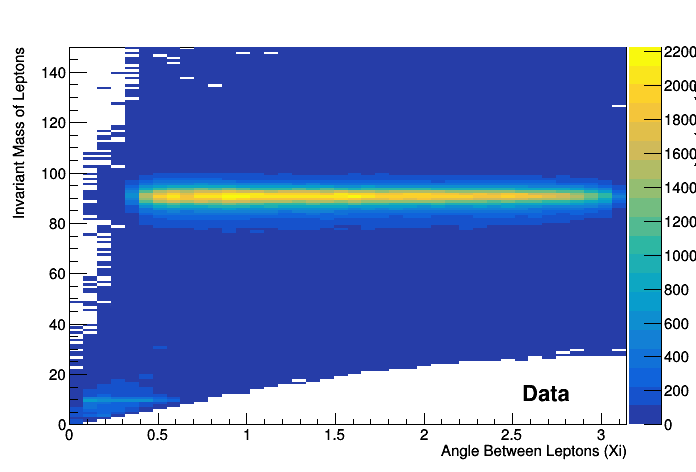

In [23]:
c = R.TCanvas("","")
InvMassVsXi.Draw("colz")
InvMassVsXi.GetXaxis().SetTitle("Angle Between Leptons (Xi)")
InvMassVsXi.GetYaxis().SetTitle("Invariant Mass of Leptons")
InvMassVsXi.GetZaxis().SetTitle("Number of Events")
InvMassVsXi.SetStats(0)
latex = R.TLatex()
latex.DrawLatexNDC(.75,.15,"Data")
c.Draw()
c.SaveAs("XiVsInvMass_Data.pdf")

In [24]:
Xi.Scale(1./Xi.Integral())

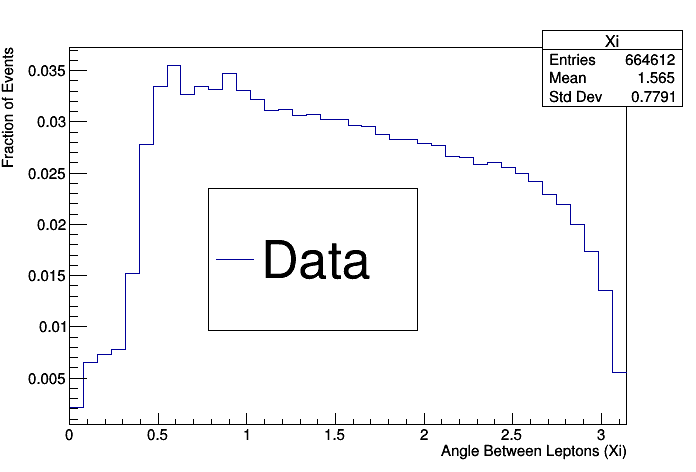

In [25]:
l = R.TLegend(0.3, 0.3, 0.6, 0.6)
Xi.Draw("hist")
Xi.GetXaxis().SetTitle("Angle Between Leptons (Xi)")
Xi.GetYaxis().SetTitle("Fraction of Events")
l.AddEntry(Xi,"Data","l")
l.Draw()
c.Update()
c.Draw()

# Monte Carlo

In [26]:
inFileNameMC = "../../Data/mc_361106.Zee.small.exactly2lep.root"
fileMC = uproot.open(inFileNameMC)

In [27]:
treeMC = b'mini;1'
branchesMC = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E' ]
kinsMC = {}
for branch in branchesMC:
    kinsMC[branch] = fileMC[treeMC].array(branch)

In [28]:
GeVperMeV = 1./1000
kinsMC[b'lep_px'] = kinsMC[b'lep_pt']*np.cos( kinsMC[b'lep_phi']) * GeVperMeV
kinsMC[b'lep_py'] = kinsMC[b'lep_pt']*np.sin( kinsMC[b'lep_phi']) * GeVperMeV
kinsMC[b'lep_pz'] = kinsMC[b'lep_pt']*np.sinh( kinsMC[b'lep_eta']) * GeVperMeV
kinsMC[b'lep_E'] = kinsMC[b'lep_E'] * GeVperMeV

kinsMC[b'lep_px_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_px'] ] )
kinsMC[b'lep_py_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_py'] ] )
kinsMC[b'lep_pz_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_pz'] ] )
kinsMC[b'lep_pmag'] = np.sqrt(kinsMC[b'lep_px_sum'] ** 2 + kinsMC[b'lep_py_sum'] ** 2 + kinsMC[b'lep_pz_sum'] ** 2)

kinsMC[b'lep_E_sum'] = np.array([ np.sum(i) for i in kinsMC[b'lep_E'] ] )

kinsMC[b'lep_m2'] = kinsMC[b'lep_E_sum']**2 - kinsMC[b'lep_pmag']**2
bad_entries = np.where(kinsMC[b'lep_m2']< 0)
for entry in bad_entries:
    kinsMC[b'lep_m2'] = np.delete(kinsMC[b'lep_m2'], entry, 0)
    
kinsMC[b'inv_mass'] = np.sqrt( kinsMC[b'lep_m2'] )

kinsMC[b'4vecs'] = []
kinsMC[b'xi'] = []
InvMassVsXi_MC = R.TH2D("InvMassVsXi_MC","",40,0,3.1415,150,0,150)
Xi_MC = R.TH1D("Xi","",40,0,3.1415)
CosAbsXi_MC = R.TH1D("CosAbsXi_MC","",20,-1,1)

for px,py,pz,E,Mass in zip(kinsMC[b'lep_px'],kinsMC[b'lep_py'],kinsMC[b'lep_pz'],kinsMC[b'lep_E'],kinsMC[b'inv_mass']):
    v0 = R.TLorentzVector(px[0],py[0],pz[0],E[0])
    v1 = R.TLorentzVector(px[1],py[1],pz[1],E[1])
    kinsMC[b'4vecs'].append([v0,v1])
    xi = v0.Angle(v1.Vect())
    M = (v0+v1).Mag()
    kinsMC[b'xi'].append(xi)
    InvMassVsXi_MC.Fill(xi,M)
    Xi_MC.Fill(xi)
    CosAbsXi_MC.Fill(np.cos(abs(xi)))
    

Warning in <TROOT::Append>: Replacing existing TH1: InvMassVsXi_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Xi (Potential memory leak).


Info in <TCanvas::Print>: pdf file XiVsInvMass_MC.pdf has been created


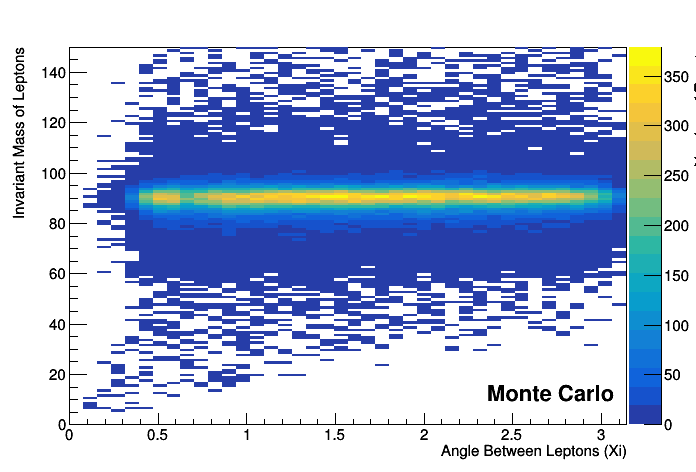

In [29]:
c = R.TCanvas("","")
InvMassVsXi_MC.Draw("colz")
InvMassVsXi_MC.GetXaxis().SetTitle("Angle Between Leptons (Xi)")
InvMassVsXi_MC.GetYaxis().SetTitle("Invariant Mass of Leptons")
InvMassVsXi_MC.GetZaxis().SetTitle("Number of Events")
InvMassVsXi_MC.SetStats(0)
latex.DrawLatexNDC(.7,.15,"Monte Carlo");
c.Draw()
c.SaveAs("XiVsInvMass_MC.pdf")

In [30]:
Xi_MC.Scale(1./Xi_MC.Integral())

Info in <TCanvas::Print>: pdf file Xi_MCvsData.pdf has been created


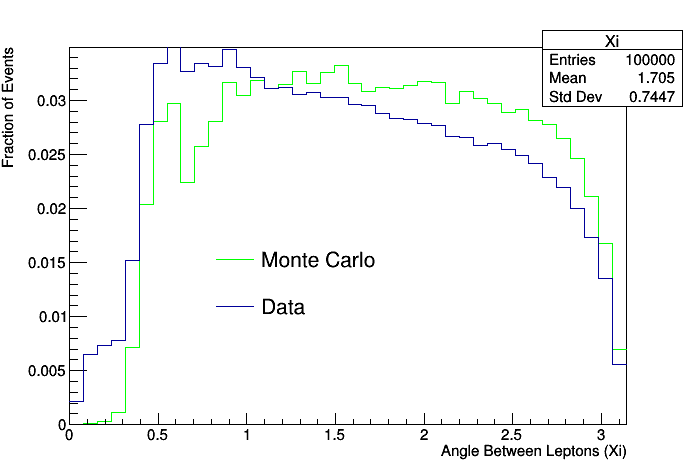

In [32]:
l = R.TLegend(0.3, 0.3, 0.6, 0.5)
l.SetBorderSize(0)

Xi_MC.Draw("hist")
Xi_MC.GetXaxis().SetTitle("Angle Between Leptons (Xi)")
Xi_MC.GetYaxis().SetTitle("Fraction of Events")
Xi_MC.SetLineColor(3)
l.AddEntry(Xi_MC,"Monte Carlo","l")

Xi.Draw("hist same")
l.AddEntry(Xi,"Data","l")

l.Draw()
c.Update()
c.Draw()
c.SaveAs("Xi_MCvsData.pdf")

In [34]:
CosAbsXi_MC.Scale(1./CosAbsXi_MC.Integral())
CosAbsXi.Scale(1./CosAbsXi.Integral())

Info in <TCanvas::Print>: pdf file CosAbsXi_MCvsData.pdf has been created


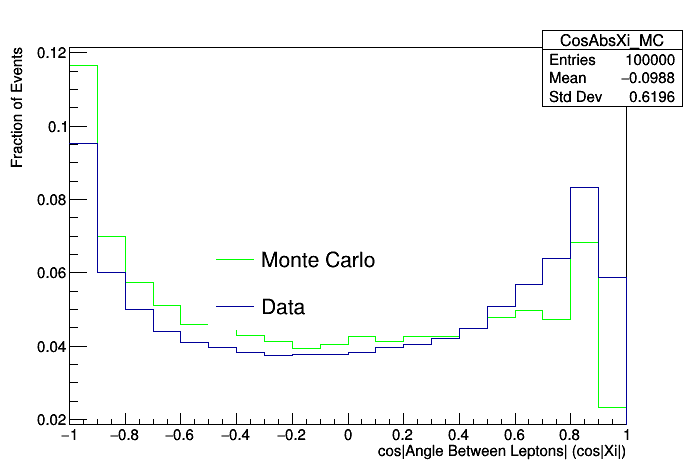

In [37]:
l = R.TLegend(0.3, 0.3, 0.6, 0.5)
l.SetBorderSize(0)

CosAbsXi_MC.Draw("hist")
CosAbsXi_MC.GetXaxis().SetTitle("cos|Angle Between Leptons| (cos|Xi|)")
CosAbsXi_MC.GetYaxis().SetTitle("Fraction of Events")
CosAbsXi_MC.SetLineColor(3)
l.AddEntry(CosAbsXi_MC,"Monte Carlo","l")

CosAbsXi.Draw("hist same")
l.AddEntry(CosAbsXi,"Data","l")

l.Draw()
c.Update()
c.Draw()
c.SaveAs("CosAbsXi_MCvsData.pdf")

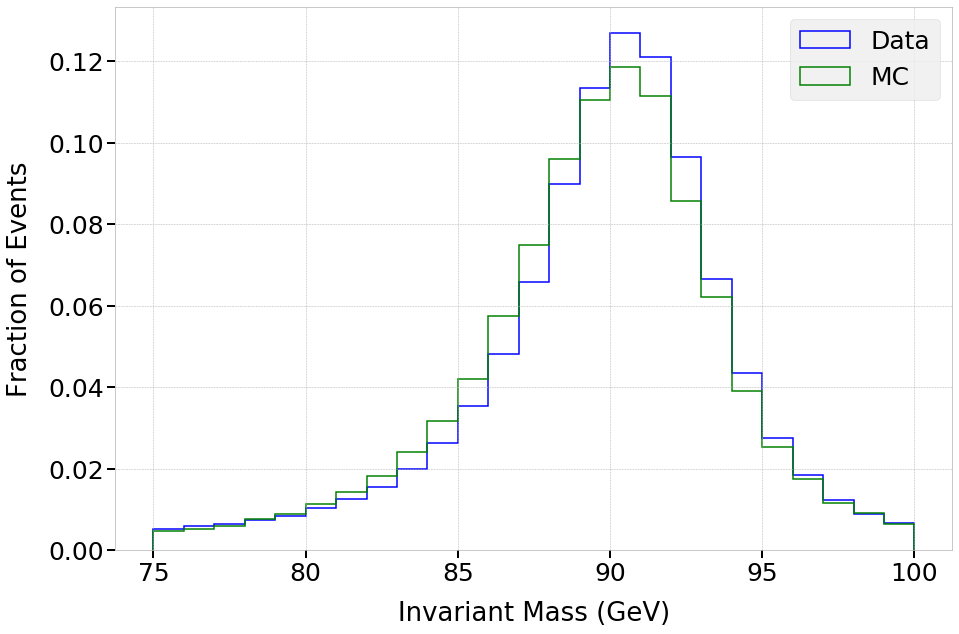

In [21]:
yTitle = "Fraction of Events"
plt.style.use('bmh')
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(75,100,26),density=True,label="Data",alpha=1.0, lw=1.5, color="blue",histtype="step")
nMC, binsMC, patchesMC = ax.hist(kinsMC[b'inv_mass'], np.linspace(75,100,26),density=True,label="MC",alpha=1.0, lw=1.5, color="green",histtype="step")
ax.legend(prop={'size': 25})
ax.set_facecolor('white')
fig.savefig("InvariantMass_DataAndMC.pdf")